# Hello, NumPy!

Based on *Deep Learning with Python*, F. Chollet, 2018, Sections 2.1-2.2. See: [https://github.com/fchollet/deep-learning-with-python-notebooks](https://github.com/fchollet/deep-learning-with-python-notebooks)

[MNIST](https://en.wikipedia.org/wiki/MNIST_database) is a classic machine learning dataset.

[Keras](https://keras.io/) has convenient tools for dataset management.

In [27]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

The MNIST dataset contains 70K images. Each image is a hand-written digit with 28x28-pixel resolution. 

In [28]:
def print_structures():
    print(
        f'training images \
            \n\tcount: {len(train_images)} \
            \n\tdimensions: {train_images.ndim} \
            \n\tshape: {train_images.shape} \
            \n\tdata type: {train_images.dtype}\n\n',
        f'testing images \
            \n\tcount: {len(test_labels)} \
            \n\tdimensions: {train_labels.ndim} \
            \n\tshape: {test_labels.shape} \
            \n\tdata type: {test_labels.dtype} \
            \n\tvalues: {test_labels}\n',
    )
print_structures()

training images             
	count: 60000             
	dimensions: 3             
	shape: (60000, 28, 28)             
	data type: uint8

 testing images             
	count: 10000             
	dimensions: 1             
	shape: (10000,)             
	data type: uint8             
	values: [7 2 1 ... 4 5 6]



Images look like this.

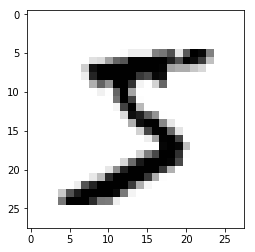

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

digit_image = train_images[0]
plt.imshow(digit_image, cmap=plt.cm.binary)

These image representations must be massaged to work with an ML system.

In [30]:
from keras.utils import to_categorical

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') /255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print_structures()

training images             
	count: 60000             
	dimensions: 2             
	shape: (60000, 784)             
	data type: float32

 testing images             
	count: 10000             
	dimensions: 2             
	shape: (10000, 10)             
	data type: float32             
	values: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

